In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_wine()

In [5]:
X=data.data
y=data.target

In [6]:
X = pd.DataFrame(X)
y=pd.DataFrame(y)

In [23]:
y=np.ravel(y)

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [13]:
X.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [14]:
y.isna().sum()

0    0
dtype: int64

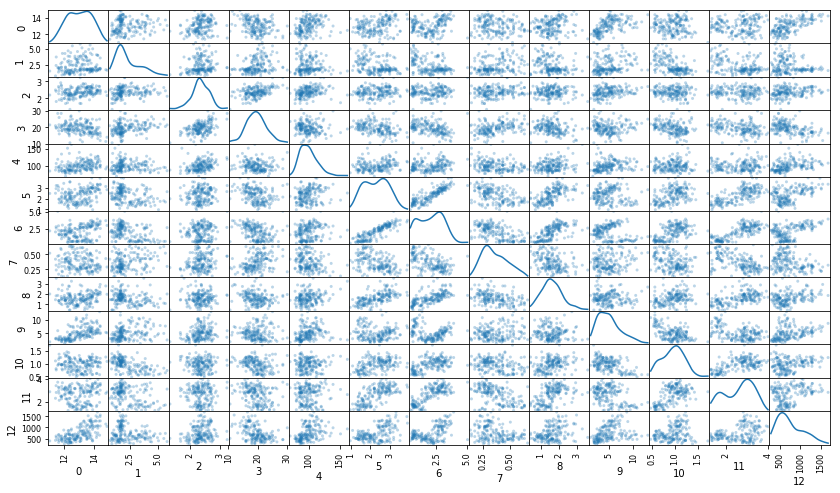

In [8]:
pd.plotting.scatter_matrix(X, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

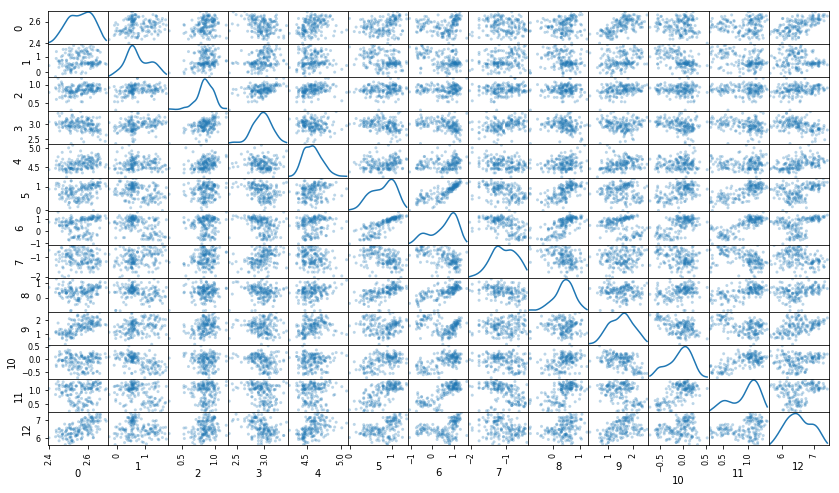

In [10]:
log_X = np.log(X)
pd.plotting.scatter_matrix(log_X, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

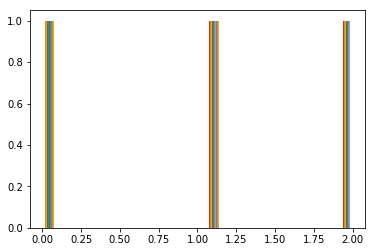

In [11]:
plt.hist(y)
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=10, weights='distance')
neighbors.fit(log_X , y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [26]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(neighbors, X, y, cv=5)
print("Erroe: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Erroe: 0.70 (+/- 0.14)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')
neighbors.fit(log_X , y)
score = cross_val_score(neighbors, X, y, cv=5)
print("Erroe: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Erroe: 0.71 (+/- 0.16)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3, weights='distance')
neighbors.fit(log_X , y)
score = cross_val_score(neighbors, X, y, cv=5)
print("Erroe: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Erroe: 0.73 (+/- 0.14)


# Regression 

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(log_X, y)
print(regr.score(log_X, y))

0.918288834081


# The regression seem a better model when compare the result below

1) KNN neighbor =3 , 73%
2) Reg 91.83%

It seems that regression is easier to setup while KNN may require a for loop to find the best neighbors and which can be another approach that need times